## Assignment 4 - EDA &FE - Healthcare Fraud Detection - Varadharajan Suresh vs2769

### Introduction
The inpatientCharges.csv dataset is provided by centers for medicare and mediaid services. It contains discharges and cost by each hospital across different states and geographical zones for various Diagnosis Related Group (DRG).


We shall be preparing and analysing the data to detect anomalies, it identify any abuse of hospital resources for monetary gain. By benchmarking common practices and filtering data beyond acceptable standards. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the csv file 26MB

In [2]:
df = pd.read_csv('inpatientCharges.csv')

Rename columns for easy of access and a glimpse into the data

In [3]:
df.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
df

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44
...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,3806.86,3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,4027.36,2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,5704.36,4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,7663.09,6848.54


Column Names and Data types 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DRG                            163065 non-null  object 
 1   Provider_Id                    163065 non-null  int64  
 2   Provider_Name                  163065 non-null  object 
 3   Provider_StreetAddress         163065 non-null  object 
 4   Provider_City                  163065 non-null  object 
 5   Provider_State                 163065 non-null  object 
 6   Provider_Zipcode               163065 non-null  int64  
 7   Hospital_referral_region_desp  163065 non-null  object 
 8   Total_Discharges               163065 non-null  int64  
 9   Average_Covered_Charges        163065 non-null  float64
 10  Average_Total_Payments         163065 non-null  float64
 11  Average_Medicare_Payment       163065 non-null  float64
dtypes: float64(3), int64(3), objec

About the data

In [177]:
df.describe()

,Provider_Id,Provider_Zipcode,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payment
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.954224,9707.473804,8494.490964
std,151563.671767,27854.323080,51.104042,35065.365931,7664.642598,7309.467261
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.900000
25%,110092.000000,27261.000000,17.000000,15947.160000,5234.500000,4192.350000
50%,250007.000000,44309.000000,27.000000,25245.820000,7214.100000,6158.460000
75%,380075.000000,72901.000000,49.000000,43232.590000,11286.400000,10056.880000
max,670077.000000,99835.000000,3383.000000,929118.900000,156158.180000,154620.810000


### Checking for missing values

In [6]:
missing_values = df.isnull().sum()
missing_values_per = (df.isnull().sum() / df.isnull().count())
pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage'])

,Count_of_Missing,Percentage
DRG,0,0.0
Provider_Id,0,0.0
Provider_Name,0,0.0
Provider_StreetAddress,0,0.0
Provider_City,0,0.0
Provider_State,0,0.0
Provider_Zipcode,0,0.0
Hospital_referral_region_desp,0,0.0
Total_Discharges,0,0.0
Average_Covered_Charges,0,0.0


## Section 1: EDA <a class="anchor" id="Section_2"></a>
### Showing the Distribution of X
### Section 1.1: Distribution plots <a class="anchor" id="Section_21"></a>

In [7]:
features = ['Total_Discharges','Average_Covered_Charges','Average_Total_Payments','Average_Medicare_Payment','Provider_Zipcode']

<Figure size 1080x360 with 0 Axes>

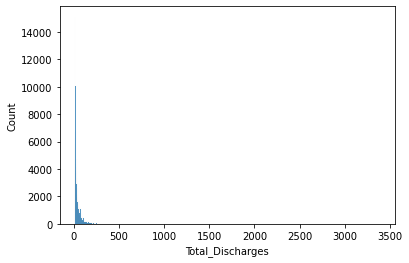

<Figure size 1080x360 with 0 Axes>

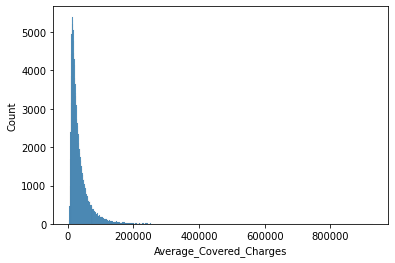

<Figure size 1080x360 with 0 Axes>

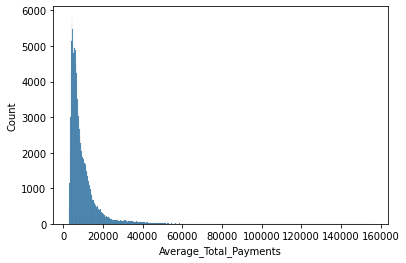

<Figure size 1080x360 with 0 Axes>

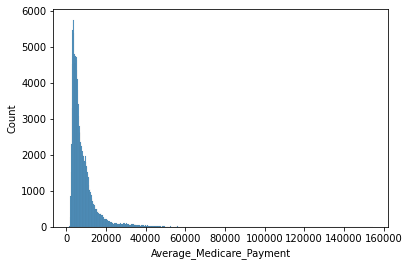

<Figure size 1080x360 with 0 Axes>

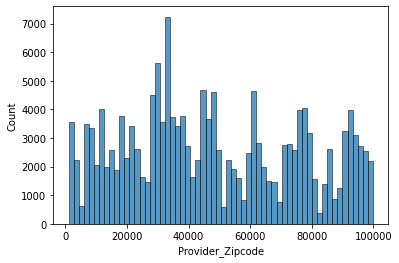

In [8]:
for i in features:
    plt.figure(figsize=(15,5))
    plt.figure(i)
    sns.histplot(df[i])

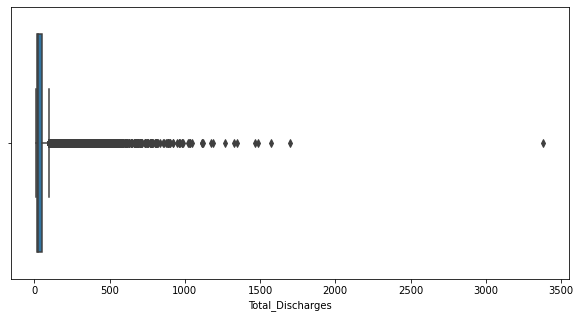

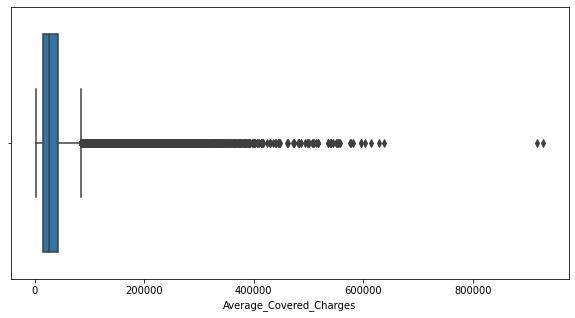

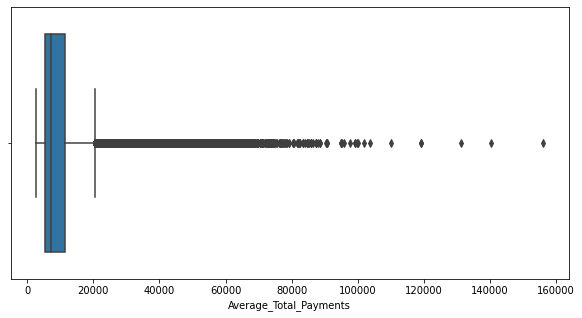

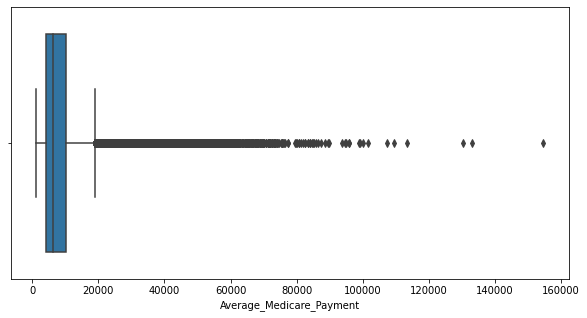

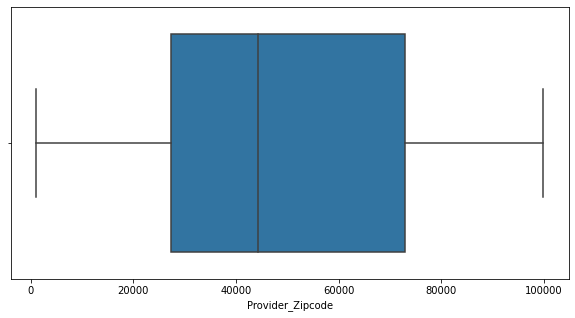

In [9]:
for i in features:
    plt.figure(figsize=(10,5)) # Plot a graph with reasonable size.
    sns.boxplot(x = i, data = df)

* We find that most of the all of the discharges are over and mosty less that 50.
* We also find that the average total payment and average medicare payment follow similar pattern, mostly less than 10,000 dollars but significant number of outliers upto 156,158 dollars

### Count by State
Following we display the count of charges for the various geographic variables.

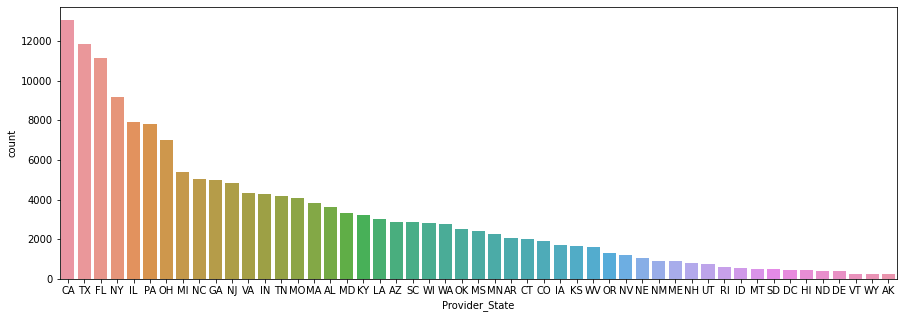

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x='Provider_State',data=df,order=df['Provider_State'].value_counts().index)
plt.rcParams["axes.labelsize"] = 20

### Count by city: Top 25 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CHICAGO'),
  Text(1, 0, 'BALTIMORE'),
  Text(2, 0, 'HOUSTON'),
  Text(3, 0, 'PHILADELPHIA'),
  Text(4, 0, 'BROOKLYN'),
  Text(5, 0, 'SPRINGFIELD'),
  Text(6, 0, 'COLUMBUS'),
  Text(7, 0, 'LOS ANGELES'),
  Text(8, 0, 'NEW YORK'),
  Text(9, 0, 'DALLAS'),
  Text(10, 0, 'LAS VEGAS'),
  Text(11, 0, 'JACKSON'),
  Text(12, 0, 'JACKSONVILLE'),
  Text(13, 0, 'COLUMBIA'),
  Text(14, 0, 'WASHINGTON'),
  Text(15, 0, 'CINCINNATI'),
  Text(16, 0, 'MIAMI'),
  Text(17, 0, 'CLEVELAND'),
  Text(18, 0, 'BOSTON'),
  Text(19, 0, 'INDIANAPOLIS'),
  Text(20, 0, 'PITTSBURGH'),
  Text(21, 0, 'OKLAHOMA CITY'),
  Text(22, 0, 'RICHMOND'),
  Text(23, 0, 'PHOENIX'),
  Text(24, 0, 'SAINT LOUIS')])

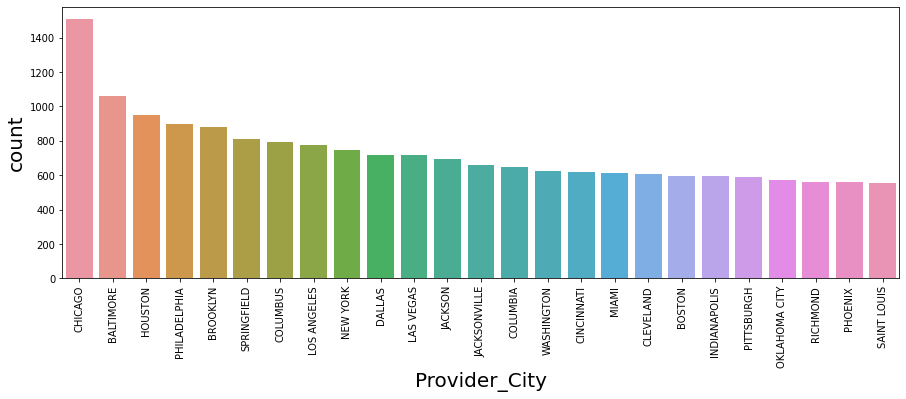

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(x='Provider_City',data=df,order=df['Provider_City'].value_counts()[:25].index)
plt.rcParams["axes.labelsize"] = 20
plt.xticks(rotation = 90)

### Correlation Matrix
We attempt to examine the correlation between the variables and find that the charges a highly correlated

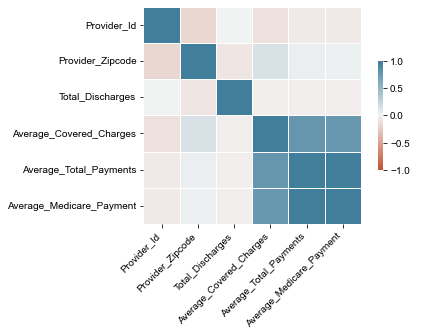

In [12]:
corr = df.corr()


# Set up the matplotlib figure
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 230, n=150),
    square=True, linewidths=.5, cbar_kws={"shrink": .5}
)

sns.set(rc={'figure.figsize':(10,10)})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Pairplot

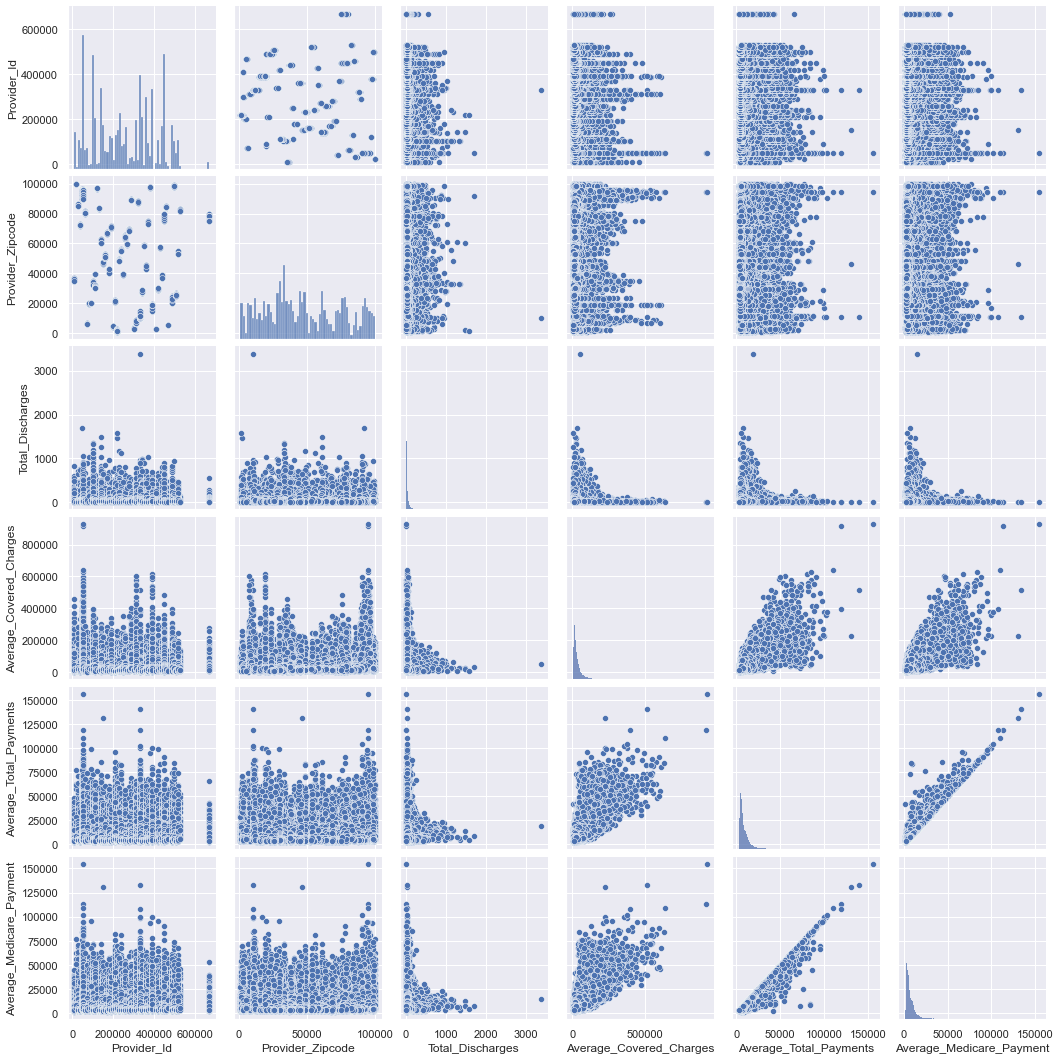

In [13]:
var_list = df.columns
sns.pairplot(df[var_list])

# Section 2 : FE

### Feature 1
Calculating the average amount spent per DRG irrespective of a state. Then creating a second column to calculate the ratio between the mean and the actual amount. This will help understand the costs comparisons across states

In [13]:
benchmark = df.groupby(['DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark.columns = ['DRG','Avg_Payment_ByDRG']
benchmark.head()

,DRG,Avg_Payment_ByDRG
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6960.534004
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,6706.276445
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,13263.823032
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,7922.671141
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,5713.985221


In [14]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df, benchmark, how='left', on=['DRG'])
# Feature 1: ratio of amount spending and average spending by drg
df1['drg_avg_ratio_amount'] = np.where(df1['Avg_Payment_ByDRG']==0,0, df1['Average_Total_Payments'] / df1['Avg_Payment_ByDRG'])
df1['drg_avg_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.248259
min           0.464005
25%           0.839686
50%           0.928391
75%           1.085989
max           9.449417
Name: drg_avg_ratio_amount, dtype: float64

In [15]:
len(df1[df1['drg_avg_ratio_amount']>2]['Provider_Name'].unique())

195

In [16]:
df1[df1['drg_avg_ratio_amount']>8]

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByDRG,drg_avg_ratio_amount
20388,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,390096,ST JOSEPH MEDICAL CENTER,2500 BERNVILLE ROAD,READING,PA,19605,PA - Reading,143,24542.94,72797.93,7718.09,9056.326570,8.038351
38923,203 - BRONCHITIS & ASTHMA W/O CC/MCC,220008,STURDY MEMORIAL HOSPITAL,211 PARK STREET,ATTLEBORO,MA,2703,RI - Providence,11,7965.18,41482.09,1790.18,4389.910134,9.449417


### Feature 2
Calculating the average amount spent per DRG and state. Then creating a second column to calculate the ratio between the mean and the actual amount. This will help understand the costs comparisons within states

In [17]:
benchmark = df.groupby(['Provider_State','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
benchmark.head()

,Provider_State,DRG,Avg_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.548333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.867500


In [18]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Provider_State','DRG'])
# Feature 2: ratio of amount spending and average spending by drg in a state
df1['drgState_avg_ratio_amount'] = np.where(df1['Avg_Payment_ByStateDRG']==0,0, df1['Average_Total_Payments'] / df1['Avg_Payment_ByStateDRG'])
df1['drgState_avg_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.195274
min           0.384805
25%           0.880824
50%           0.956830
75%           1.064688
max           7.857934
Name: drgState_avg_ratio_amount, dtype: float64

In [19]:
len(df1[df1['drgState_avg_ratio_amount']>2]['Provider_Name'].unique())

124

In [20]:
df1[df1['drgState_avg_ratio_amount']>7]

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByDRG,drg_avg_ratio_amount,Avg_Payment_ByStateDRG,drgState_avg_ratio_amount
20388,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,390096,ST JOSEPH MEDICAL CENTER,2500 BERNVILLE ROAD,READING,PA,19605,PA - Reading,143,24542.94,72797.93,7718.09,9056.326570,8.038351,9264.257684,7.857934
38923,203 - BRONCHITIS & ASTHMA W/O CC/MCC,220008,STURDY MEMORIAL HOSPITAL,211 PARK STREET,ATTLEBORO,MA,2703,RI - Providence,11,7965.18,41482.09,1790.18,4389.910134,9.449417,5711.287429,7.263177


### Feature 3
Calculating the average amount spent per DRG and Hospital_referral_region_desp. Then creating a second column to calculate the ratio between the mean and the actual amount. This will help understand the costs comparisons within Hospital_referral_region_desp

In [21]:
benchmark = df.groupby(['Hospital_referral_region_desp','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark.columns = ['Hospital_referral_region_desp','DRG','Avg_Payment_ByRegionDRG']
benchmark.head()

,Hospital_referral_region_desp,DRG,Avg_Payment_ByRegionDRG
0,AK - Anchorage,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK - Anchorage,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK - Anchorage,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010000
3,AK - Anchorage,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.548333
4,AK - Anchorage,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.867500


In [22]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Hospital_referral_region_desp','DRG'])
# Feature 3: ratio of amount spending and average spending by drg in a Hospital_referral_region_desp
df1['drgRegion_avg_ratio_amount'] = np.where(df1['Avg_Payment_ByRegionDRG']==0,0, df1['Average_Total_Payments'] / df1['Avg_Payment_ByRegionDRG'])
df1['drgRegion_avg_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.159145
min           0.271255
25%           0.902856
50%           0.977701
75%           1.057561
max           4.848303
Name: drgRegion_avg_ratio_amount, dtype: float64

In [23]:
len(df1[df1['drgRegion_avg_ratio_amount']>2]['Provider_Name'].unique())

64

In [24]:
df1[df1['drgRegion_avg_ratio_amount']>4]

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByDRG,drg_avg_ratio_amount,Avg_Payment_ByStateDRG,drgState_avg_ratio_amount,Avg_Payment_ByRegionDRG,drgRegion_avg_ratio_amount
37716,202 - BRONCHITIS & ASTHMA W CC/MCC,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,17,43980.52,41458.47,37236.0,6011.322103,6.896731,8374.755758,4.950409,9473.928889,4.376059
162713,948 - SIGNS & SYMPTOMS W/O MCC,390312,CANCER TREATMENT CENTERS OF AMERICA,1331 EAST WYOMING AVENUE,PHILADELPHIA,PA,19124,PA - Philadelphia,24,83945.95,28968.20,8894.2,4824.766436,6.004063,5018.809241,5.771927,5974.915484,4.848303


### Feature 4
Calculating the average amount spent per DRG and city. Then creating a second column to calculate the ratio between the mean and the actual amount. This will help understand the costs comparisons within cities in a state.
We are grouping by state and city to calculate average because there might be cities with same name in different states.

In [25]:
benchmark = df.groupby(['Provider_State','Provider_City','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark.columns = ['Provider_State','Provider_City','DRG','Avg_Payment_ByCityDRG']
benchmark.head()

,Provider_State,Provider_City,DRG,Avg_Payment_ByCityDRG
0,AK,ANCHORAGE,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK,ANCHORAGE,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK,ANCHORAGE,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,17773.020000
3,AK,ANCHORAGE,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11348.766667
4,AK,ANCHORAGE,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8729.390000


In [26]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Provider_State','Provider_City','DRG'])
# Feature 4: ratio of amount spending and average spending by drg in a city
df1['drgCity_avg_ratio_amount'] = np.where(df1['Avg_Payment_ByCityDRG']==0,0, df1['Average_Total_Payments'] / df1['Avg_Payment_ByCityDRG'])
df1['drgCity_avg_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.092549
min           0.238195
25%           1.000000
50%           1.000000
75%           1.000000
max           3.753099
Name: drgCity_avg_ratio_amount, dtype: float64

In [27]:
len(df1[df1['drgCity_avg_ratio_amount']>2]['Provider_Name'].unique())

14

In [28]:
df1[df1['drgCity_avg_ratio_amount']>3]

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByDRG,drg_avg_ratio_amount,Avg_Payment_ByStateDRG,drgState_avg_ratio_amount,Avg_Payment_ByRegionDRG,drgRegion_avg_ratio_amount,Avg_Payment_ByCityDRG,drgCity_avg_ratio_amount
37716,202 - BRONCHITIS & ASTHMA W CC/MCC,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,17,43980.52,41458.47,37236.0,6011.322103,6.896731,8374.755758,4.950409,9473.928889,4.376059,11046.464,3.753099
162713,948 - SIGNS & SYMPTOMS W/O MCC,390312,CANCER TREATMENT CENTERS OF AMERICA,1331 EAST WYOMING AVENUE,PHILADELPHIA,PA,19124,PA - Philadelphia,24,83945.95,28968.20,8894.2,4824.766436,6.004063,5018.809241,5.771927,5974.915484,4.848303,8350.448,3.469059


### Feature 5
Calculating the average amount spent per DRG and Zipcode. Then creating a second column to calculate the ratio between the mean and the actual amount. This will help understand the costs comparisons within cities in a Zipcode.

In [29]:
benchmark = df.groupby(['Provider_Zipcode','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark.columns = ['Provider_Zipcode','DRG','Avg_Payment_ByZipDRG']
benchmark.head()

,Provider_Zipcode,DRG,Avg_Payment_ByZipDRG
0,1040,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,7130.69
1,1040,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11785.76
2,1040,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,7609.65
3,1040,069 - TRANSIENT ISCHEMIA,4859.96
4,1040,101 - SEIZURES W/O MCC,5059.14


In [30]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Provider_Zipcode','DRG'])
# Feature 5: ratio of amount spending and average spending by drg in a city
df1['drgZip_avg_ratio_amount'] = np.where(df1['Avg_Payment_ByZipDRG']==0,0, df1['Average_Total_Payments'] / df1['Avg_Payment_ByZipDRG'])
df1['drgZip_avg_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.035360
min           0.303604
25%           1.000000
50%           1.000000
75%           1.000000
max           1.897813
Name: drgZip_avg_ratio_amount, dtype: float64

In [31]:
df1[df1['drgZip_avg_ratio_amount']>1.4999]

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,...,Avg_Payment_ByDRG,drg_avg_ratio_amount,Avg_Payment_ByStateDRG,drgState_avg_ratio_amount,Avg_Payment_ByRegionDRG,drgRegion_avg_ratio_amount,Avg_Payment_ByCityDRG,drgCity_avg_ratio_amount,Avg_Payment_ByZipDRG,drgZip_avg_ratio_amount
16057,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,330013,ALBANY MEDICAL CENTER HOSPITAL,43 NEW SCOTLAND AVENUE,ALBANY,NY,12208,NY - Albany,11,101070.36,...,13829.385496,2.580684,17246.198333,2.069399,14782.019231,2.414370,23131.575000,1.542881,23131.575000,1.542881
29126,193 - SIMPLE PNEUMONIA & PLEURISY W MCC,40016,UAMS MEDICAL CENTER,4301 WEST MARKHAM STREET MAIL SLOT 612,LITTLE ROCK,AR,72205,AR - Little Rock,68,49928.55,...,10053.683177,1.700526,8698.876061,1.965375,8812.345789,1.940068,10363.245000,1.649729,11345.470000,1.506905
80031,312 - SYNCOPE & COLLAPSE,40016,UAMS MEDICAL CENTER,4301 WEST MARKHAM STREET MAIL SLOT 612,LITTLE ROCK,AR,72205,AR - Little Rock,31,45348.58,...,5003.199240,2.876384,4592.729200,3.133457,4803.203750,2.996150,6644.077500,2.166007,7603.646667,1.892660
92330,377 - G.I. HEMORRHAGE W MCC,330350,UNIVERSITY HOSPITAL OF BROOKLYN ( DOWNSTATE ),445 LENOX ROAD,BROOKLYN,NY,11203,NY - Manhattan,25,114716.72,...,12490.130542,4.898011,16231.499900,3.769017,22181.768333,2.757977,24799.446923,2.466861,34163.193333,1.790723
109462,460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,150166,PINNACLE HOSPITAL,9301 CONNECTICUT DR,CROWN POINT,IN,46307,IN - Gary,14,225729.14,...,27778.671119,4.722593,29810.952564,4.400643,43758.768333,2.997967,77332.980000,1.696396,77332.980000,1.696396
113739,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450880,BAYLOR SURGICAL HOSPITAL AT FORT WORTH,750 12TH AVENUE,FORT WORTH,TX,76104,TX - Fort Worth,113,39467.76,...,14566.929215,2.655761,13950.560045,2.773099,15010.779545,2.577233,17619.263750,2.195681,20384.666000,1.897813
128071,638 - DIABETES W CC,140030,SHERMAN HOSPITAL,1425 NORTH RANDALL ROAD,ELGIN,IL,60123,IL - Elgin,23,28618.86,...,5889.570467,2.442674,6097.494778,2.359379,7350.992500,1.957055,9542.180000,1.507653,9542.180000,1.507653
130909,"640 - MISC DISORDERS OF NUTRITION,METABOLISM,F...",450068,MEMORIAL HERMANN TEXAS MEDICAL CENTER,6411 FANNIN,HOUSTON,TX,77030,TX - Houston,56,56178.03,...,8129.881570,2.309416,7640.931343,2.457198,8319.361667,2.256817,9190.058462,2.042999,12036.830000,1.559819


### Feature 6
Calculating the average discarges per DRG irrespective of a state. Then creating a second column to calculate the ratio between the mean and the actual discharges. This will help understand the discharge comparisons across states

In [32]:
benchmark = df.groupby(['DRG'])['Total_Discharges'].mean().reset_index()
benchmark.columns = ['DRG','Avg_Discharges_ByDRG']
benchmark.head()

,DRG,Avg_Discharges_ByDRG
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,31.145505
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,25.155704
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,37.427969
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,46.899074
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,30.924142


In [33]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['DRG'])
# Feature 6: ratio of discharges and average discharges by drg in a city
df1['drg_avg_ratio_discharges'] = np.where(df1['Avg_Discharges_ByDRG']==0,0, df1['Total_Discharges'] / df1['Avg_Discharges_ByDRG'])
df1['drg_avg_ratio_discharges'].describe()

count    163065.000000
mean          1.000000
std           0.760072
min           0.070809
25%           0.523420
50%           0.788843
75%           1.238076
max          44.569469
Name: drg_avg_ratio_discharges, dtype: float64

In [34]:
len(df1[df1['drg_avg_ratio_discharges']>2]['Provider_Name'].unique())

1259

In [35]:
df1[df1['drg_avg_ratio_discharges']>44]

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,...,Avg_Payment_ByStateDRG,drgState_avg_ratio_amount,Avg_Payment_ByRegionDRG,drgRegion_avg_ratio_amount,Avg_Payment_ByCityDRG,drgCity_avg_ratio_amount,Avg_Payment_ByZipDRG,drgZip_avg_ratio_amount,Avg_Discharges_ByDRG,drg_avg_ratio_discharges
158518,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,220062,ADCARE HOSPITAL OF WORCESTER INC,107 LINCOLN STREET,WORCESTER,MA,1605,MA - Worcester,1571,4227.46,...,5161.984545,0.962335,5298.505,0.93754,5931.033333,0.837554,4967.56,1.0,35.248344,44.569469


### Feature 7
Calculating the average discharges spent per DRG and state. Then creating a second column to calculate the ratio between the mean and the actual discharges. This will help understand the discharges comparisons within states

In [36]:
benchmark = df.groupby(['Provider_State','DRG'])['Total_Discharges'].mean().reset_index()
benchmark.columns = ['Provider_State','DRG','Avg_Discharges_ByStateDRG']
benchmark.head()

,Provider_State,DRG,Avg_Discharges_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,23.000000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,11.000000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,22.500000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,25.333333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21.000000


In [37]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Provider_State','DRG'])
# Feature 7: ratio of total discharges and average discharges by drg in a state
df1['drgState_avg_ratio_discharges'] = np.where(df1['Avg_Discharges_ByStateDRG']==0,0, df1['Total_Discharges'] / df1['Avg_Discharges_ByStateDRG'])
df1['drgState_avg_ratio_discharges'].describe()

count    163065.000000
mean          1.000000
std           0.686087
min           0.045025
25%           0.550452
50%           0.819820
75%           1.251471
max          24.624593
Name: drgState_avg_ratio_discharges, dtype: float64

In [38]:
len(df1[df1['drgState_avg_ratio_discharges']>2]['Provider_Name'].unique())

1227

In [39]:
df1[df1['drgState_avg_ratio_discharges']>24]

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,...,Avg_Payment_ByRegionDRG,drgRegion_avg_ratio_amount,Avg_Payment_ByCityDRG,drgCity_avg_ratio_amount,Avg_Payment_ByZipDRG,drgZip_avg_ratio_amount,Avg_Discharges_ByDRG,drg_avg_ratio_discharges,Avg_Discharges_ByStateDRG,drgState_avg_ratio_discharges
112969,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NY - Manhattan,3383,53113.58,...,22709.351,0.837703,23000.354444,0.827105,20525.163333,0.926848,155.348,21.776914,137.382979,24.624593


### Feature 8
Calculating the average discharges spent per DRG and Hospital_referral_region_desp. Then creating a second column to calculate the ratio between the mean and the actual discharges. This will help understand the discharges comparisons within Hospital_referral_region_desp

In [40]:
benchmark = df.groupby(['Hospital_referral_region_desp','DRG'])['Total_Discharges'].mean().reset_index()
benchmark.columns = ['Hospital_referral_region_desp','DRG','Avg_Discharges_ByRegionDRG']
benchmark.head()

,Hospital_referral_region_desp,DRG,Avg_Discharges_ByRegionDRG
0,AK - Anchorage,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,23.000000
1,AK - Anchorage,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,11.000000
2,AK - Anchorage,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,22.500000
3,AK - Anchorage,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,25.333333
4,AK - Anchorage,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21.000000


In [41]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Hospital_referral_region_desp','DRG'])
# Feature 8: ratio of amount spending and average spending by drg in a Hospital_referral_region_desp
df1['drgRegion_avg_ratio_discharges'] = np.where(df1['Avg_Discharges_ByRegionDRG']==0,0, df1['Total_Discharges'] / df1['Avg_Discharges_ByRegionDRG'])
df1['drgRegion_avg_ratio_discharges'].describe()

count    163065.000000
mean          1.000000
std           0.596288
min           0.015412
25%           0.592105
50%           0.886894
75%           1.250000
max          11.008786
Name: drgRegion_avg_ratio_discharges, dtype: float64

In [42]:
len(df1[df1['drgState_avg_ratio_discharges']>11]['Provider_Name'].unique())

4

In [43]:
df1[df1['drgState_avg_ratio_discharges']>11]

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,...,Avg_Payment_ByCityDRG,drgCity_avg_ratio_amount,Avg_Payment_ByZipDRG,drgZip_avg_ratio_amount,Avg_Discharges_ByDRG,drg_avg_ratio_discharges,Avg_Discharges_ByStateDRG,drgState_avg_ratio_discharges,Avg_Discharges_ByRegionDRG,drgRegion_avg_ratio_discharges
80295,312 - SYNCOPE & COLLAPSE,100007,FLORIDA HOSPITAL,601 E ROLLINS ST,ORLANDO,FL,32803,FL - Orlando,984,24118.51,...,4801.620000,0.963185,4624.850000,1.000000,62.027098,15.864034,85.506494,11.507898,116.321429,8.459318
112969,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NY - Manhattan,3383,53113.58,...,23000.354444,0.827105,20525.163333,0.926848,155.348000,21.776914,137.382979,24.624593,307.300000,11.008786
158235,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,50752,BROTMAN MEDICAL CENTER,3828 DELMAS TERRACE,CULVER CITY,CA,90231,CA - Los Angeles,510,19917.41,...,4986.280000,1.000000,4986.280000,1.000000,35.248344,14.468765,33.161290,15.379377,55.125000,9.251701
158518,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,220062,ADCARE HOSPITAL OF WORCESTER INC,107 LINCOLN STREET,WORCESTER,MA,1605,MA - Worcester,1571,4227.46,...,5931.033333,0.837554,4967.560000,1.000000,35.248344,44.569469,68.045455,23.087508,281.666667,5.577515


### Feature 9
Calculating the average discharges spent per DRG and city. Then creating a second column to calculate the ratio between the mean and the actual discharges. This will help understand the discharges comparisons within cities in a state.
We are grouping by state and city to calculate average because there might be cities with same name in different states.

In [44]:
benchmark = df.groupby(['Provider_State','Provider_City','DRG'])['Total_Discharges'].mean().reset_index()
benchmark.columns = ['Provider_State','Provider_City','DRG','Avg_Discharges_ByCityDRG']
benchmark.head()

,Provider_State,Provider_City,DRG,Avg_Discharges_ByCityDRG
0,AK,ANCHORAGE,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,23.000000
1,AK,ANCHORAGE,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,11.000000
2,AK,ANCHORAGE,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,34.000000
3,AK,ANCHORAGE,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,33.666667
4,AK,ANCHORAGE,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,27.500000


In [45]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Provider_State','Provider_City','DRG'])
# Feature 9: ratio of amount spending and average spending by drg in a city
df1['drgCity_avg_ratio_discharges'] = np.where(df1['Avg_Discharges_ByCityDRG']==0,0, df1['Total_Discharges'] / df1['Avg_Discharges_ByCityDRG'])
df1['drgCity_avg_ratio_discharges'].describe()

count    163065.000000
mean          1.000000
std           0.295053
min           0.019540
25%           1.000000
50%           1.000000
75%           1.000000
max           5.622857
Name: drgCity_avg_ratio_discharges, dtype: float64

In [46]:
len(df1[df1['drgCity_avg_ratio_discharges']>2]['Provider_Name'].unique())

285

In [47]:
df1[df1['drgCity_avg_ratio_discharges']>5]

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,...,Avg_Payment_ByZipDRG,drgZip_avg_ratio_amount,Avg_Discharges_ByDRG,drg_avg_ratio_discharges,Avg_Discharges_ByStateDRG,drgState_avg_ratio_discharges,Avg_Discharges_ByRegionDRG,drgRegion_avg_ratio_discharges,Avg_Discharges_ByCityDRG,drgCity_avg_ratio_discharges
102629,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",140281,NORTHWESTERN MEMORIAL HOSPITAL,251 E HURON ST,CHICAGO,IL,60611,IL - Chicago,448,20482.50,...,6321.750000,1.000000,83.001356,5.397502,106.760000,4.196328,87.370370,5.127596,87.370370,5.127596
111610,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,50625,CEDARS-SINAI MEDICAL CENTER,8700 BEVERLY BLVD,LOS ANGELES,CA,90048,CA - Los Angeles,738,110123.21,...,18690.780000,1.000000,155.348000,4.750624,126.514894,5.833305,108.338983,6.811952,131.250000,5.622857
112969,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NY - Manhattan,3383,53113.58,...,20525.163333,0.926848,155.348000,21.776914,137.382979,24.624593,307.300000,11.008786,614.111111,5.508775
125144,603 - CELLULITIS W/O MCC,50625,CEDARS-SINAI MEDICAL CENTER,8700 BEVERLY BLVD,LOS ANGELES,CA,90048,CA - Los Angeles,272,55841.68,...,8035.030000,1.000000,50.193801,5.418996,41.864407,6.497166,45.582090,5.967256,51.812500,5.249698
154650,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,450184,MEMORIAL HERMANN HOSPITAL SYSTEM,1635 NORTH LOOP WEST,HOUSTON,TX,77008,TX - Houston,754,35003.01,...,12726.680000,1.000000,113.467994,6.645046,107.148148,7.036986,98.021277,7.692208,145.266667,5.190454


### Feature 10
Calculating the average discharges spent per DRG and Zipcode. Then creating a second column to calculate the ratio between the mean and the actual discharges. This will help understand the discharges comparisons within cities in a Zipcode.

In [48]:
benchmark = df.groupby(['Provider_Zipcode','DRG'])['Total_Discharges'].mean().reset_index()
benchmark.columns = ['Provider_Zipcode','DRG','Avg_Discharges_ByZipDRG']
benchmark.head()

,Provider_Zipcode,DRG,Avg_Discharges_ByZipDRG
0,1040,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,13.0
1,1040,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,17.0
2,1040,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,26.0
3,1040,069 - TRANSIENT ISCHEMIA,26.0
4,1040,101 - SEIZURES W/O MCC,21.0


In [49]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Provider_Zipcode','DRG'])
# Feature 10: ratio of amount spending and average spending by drg in a city
df1['drgZip_avg_ratio_discharges'] = np.where(df1['Avg_Discharges_ByZipDRG']==0,0, df1['Total_Discharges'] / df1['Avg_Discharges_ByZipDRG'])
df1['drgZip_avg_ratio_discharges'].describe()

count    163065.000000
mean          1.000000
std           0.122841
min           0.028081
25%           1.000000
50%           1.000000
75%           1.000000
max           3.019324
Name: drgZip_avg_ratio_discharges, dtype: float64

In [50]:
len(df1[df1['drgZip_avg_ratio_discharges']>2]['Provider_Name'].unique())

12

In [51]:
df1[df1['drgZip_avg_ratio_discharges']>3]

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,...,Avg_Discharges_ByDRG,drg_avg_ratio_discharges,Avg_Discharges_ByStateDRG,drgState_avg_ratio_discharges,Avg_Discharges_ByRegionDRG,drgRegion_avg_ratio_discharges,Avg_Discharges_ByCityDRG,drgCity_avg_ratio_discharges,Avg_Discharges_ByZipDRG,drgZip_avg_ratio_discharges
113682,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,450672,PLAZA MEDICAL CENTER OF FORT WORTH,900 EIGHTH AVENUE,FORT WORTH,TX,76104,TX - Fort Worth,750,121140.24,...,155.348,4.82787,134.352679,5.582323,108.136364,6.935687,175.75,4.267425,248.4,3.019324


#### The newly creates features

In [52]:
features2 = ['drg_avg_ratio_amount',
'drgState_avg_ratio_amount',
'drgRegion_avg_ratio_amount',
'drgCity_avg_ratio_amount',
'drgZip_avg_ratio_amount',
'drg_avg_ratio_discharges',
'drgState_avg_ratio_discharges',
'drgRegion_avg_ratio_discharges',
'drgCity_avg_ratio_discharges',
'drgZip_avg_ratio_discharges']

#### The hospital with more than double the cost and double the discharge rates across the nation

In [53]:
df1[(df1['drg_avg_ratio_amount']>2) & (df1['drg_avg_ratio_discharges']>2)]['Provider_Name'].unique()

array(['UNIVERSITY OF MARYLAND MEDICAL CENTER',
       'JOHNS HOPKINS HOSPITAL, THE',
       'JOHNS HOPKINS BAYVIEW MEDICAL CENTER',
       'MAIMONIDES MEDICAL CENTER', 'UMASS MEMORIAL MEDICAL CENTER INC',
       'NYU HOSPITALS CENTER', 'CEDARS-SINAI MEDICAL CENTER',
       'STANFORD HOSPITAL', 'ST JOSEPH MEDICAL CENTER',
       'AVERA HEART HOSPITAL OF SOUTH DAKOTA LLC',
       'MEDICAL COLLEGE OF VIRGINIA HOSPITALS',
       'NEW YORK-PRESBYTERIAN HOSPITAL', 'BRONX-LEBANON HOSPITAL CENTER',
       'UCSF MEDICAL CENTER', 'JACKSON MEMORIAL HOSPITAL',
       'MEMORIAL HERMANN TEXAS MEDICAL CENTER',
       'UNIVERSITY OF ILLINOIS HOSPITAL'], dtype=object)

<Figure size 1080x360 with 0 Axes>

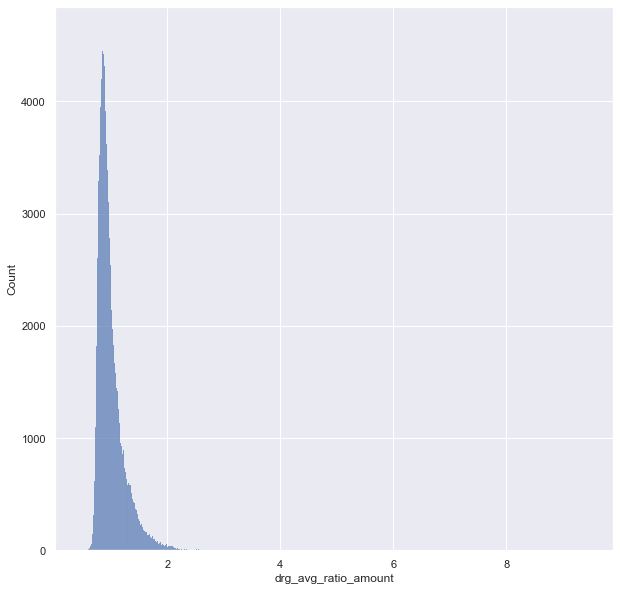

<Figure size 1080x360 with 0 Axes>

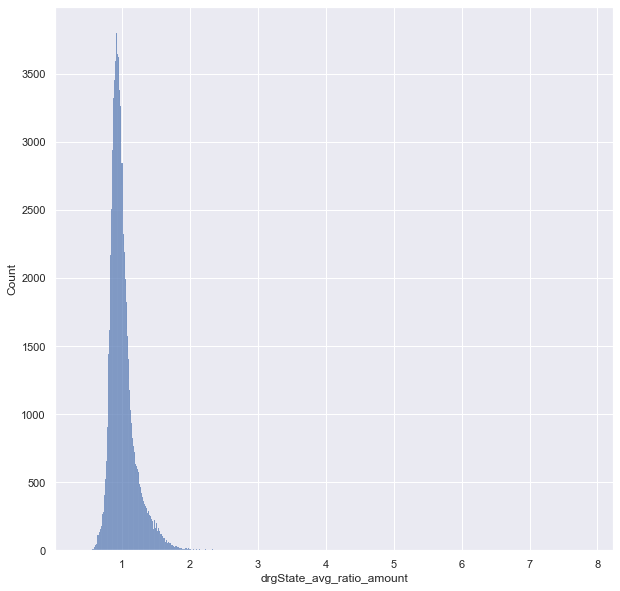

<Figure size 1080x360 with 0 Axes>

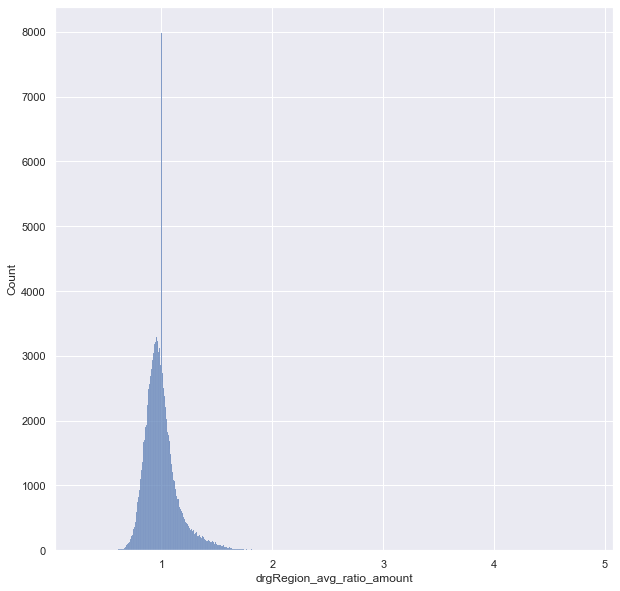

<Figure size 1080x360 with 0 Axes>

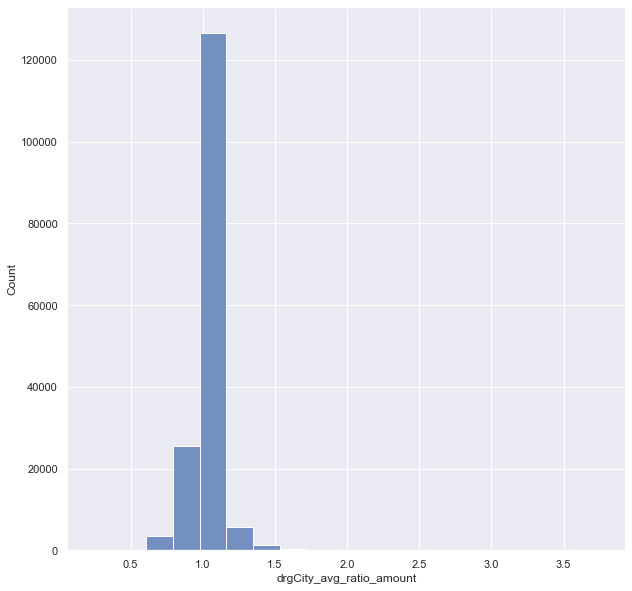

<Figure size 1080x360 with 0 Axes>

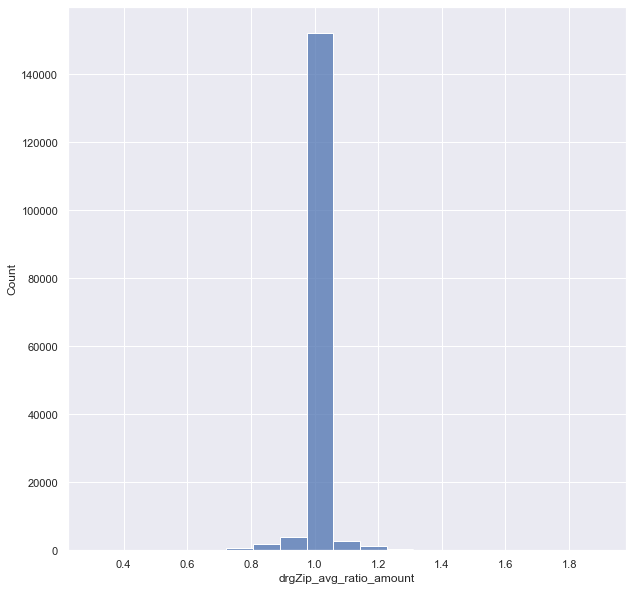

<Figure size 1080x360 with 0 Axes>

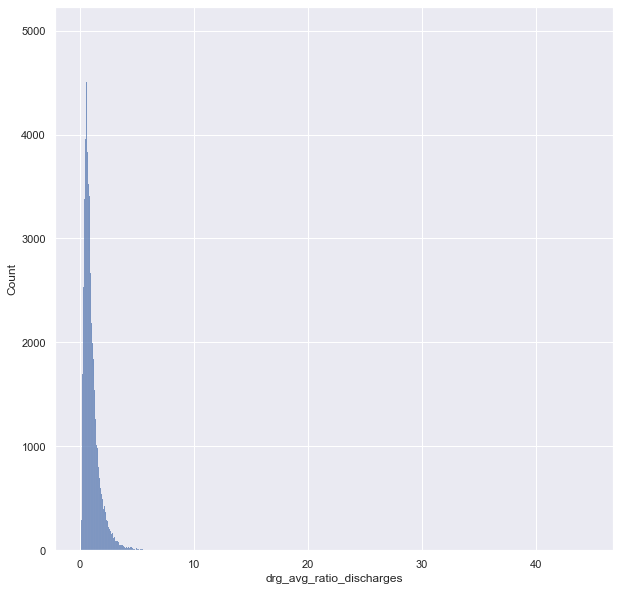

<Figure size 1080x360 with 0 Axes>

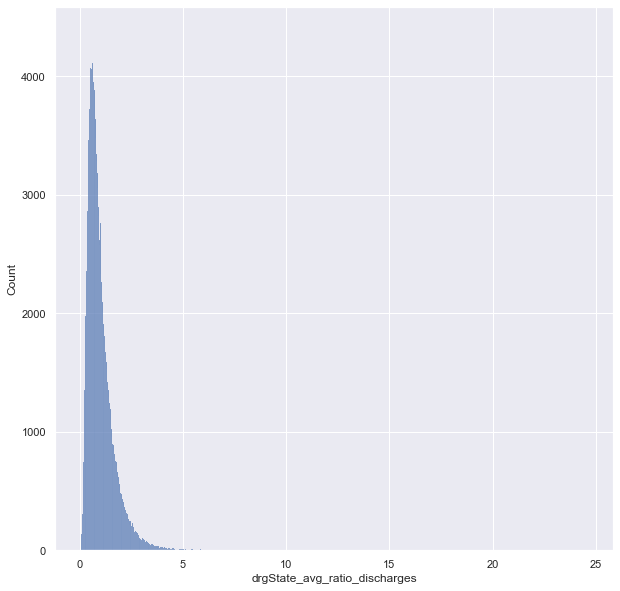

<Figure size 1080x360 with 0 Axes>

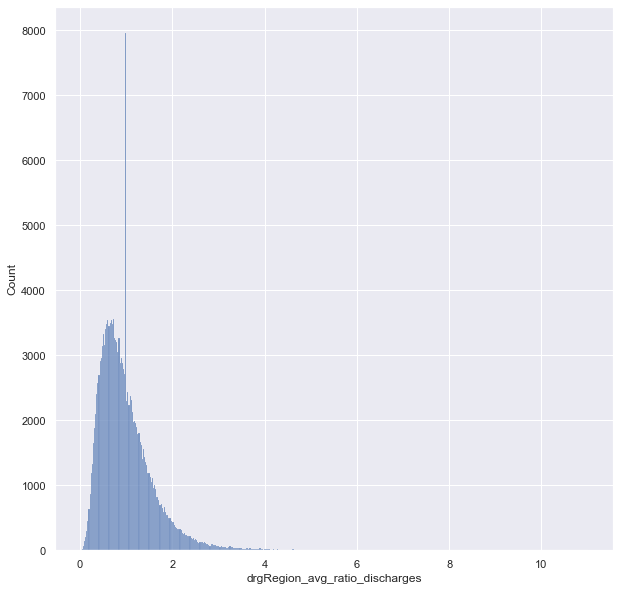

<Figure size 1080x360 with 0 Axes>

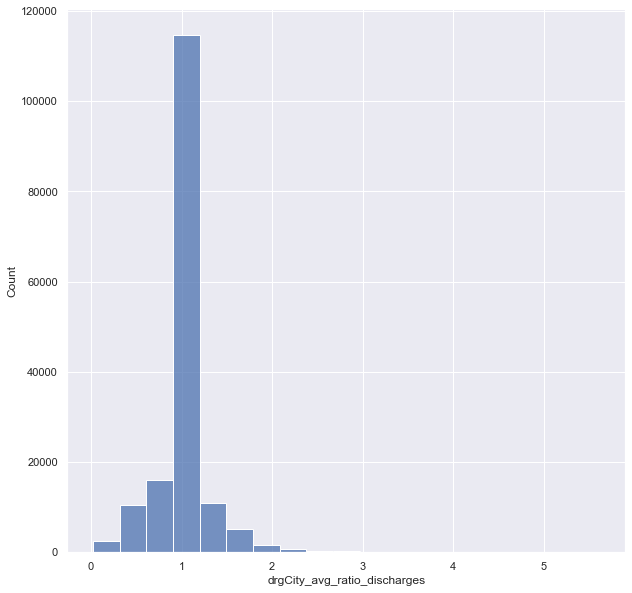

<Figure size 1080x360 with 0 Axes>

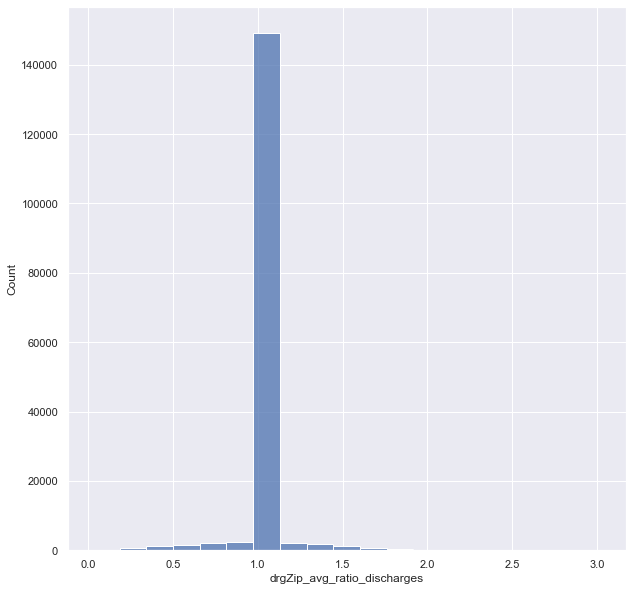

In [54]:
for i in features2:
    plt.figure(figsize=(15,5))
    plt.figure(i)
    sns.histplot(df1[i])

### Interpreting the new created features and their charts
#### Average_Total_Payments
* Most of the cities, over 75%  have similar charges a specific DRG but there stands an outlier costing 9 times the average. 195 hospitals cost double over other and 2 stand out extremely ST JOSEPH MEDICAL CENTER, PA costs 8 times more and STURDY MEMORIAL HOSPITAL, MA 9 times more.

* Most hospitals cost, over 75% have similar charges in a given state for particular ailment. over 124 cost over double their states average and again ST JOSEPH MEDICAL CENTER, PA and  STURDY MEMORIAL HOSPITAL, MA stand out as extremes.

* Most charges within a given hospital referral zone charges are constant, 64 charge double and 2 stand as extreme outliers THE JOHNS HOPKINS HOSPITAL,MD and CANCER TREATMENT CENTERS OF AMERICA, PA charging quadriple times the cost.

* Most hospitals cost similar charges in a given city for particular DRG. over 14 of them cost over double their city's average and again THE JOHNS HOPKINS HOSPITAL,MD and CANCER TREATMENT CENTERS OF AMERICA, PA stand out as extremes charging triple the cost.

* All hospitals in a given charge same price, just 8 hospitals charge 50% more that other hospitals.

#### Discharges
* Most of the hospitals, over 75%  have similar discharges a specific DRG but there stands an outlier attending 44 times the average. 1,259 hospitals have double discharges over others in their cities and ADCARE HOSPITAL OF WORCESTER INC stand out 44.5 times discharges for alcoholism related treatments.

* Most hospitals have similar discharges rates over 75% in a given state for particular ailment. over 1,227 have over twice their states average and HOSPITAL FOR SPECIAL SURGERY, NY stands out in joint replacement and reattachments.

* Most discharges within a given hospital referral zone charges are constant, 1,227 have double discharge rate and 4 stand as extreme outliers having 11times more discharge rates,  HOSPITAL FOR SPECIAL SURGERY, NY and ADCARE HOSPITAL OF WORCESTER INC, MA are to be of special mention of the 4.

* Most hospitals cost similar charges in a given city for particular DRG. over 285 of them cost over double their city's average. 5 hospitals charges 5 times their cities averges and HOSPITAL FOR SPECIAL SURGERY, NY appears again as an outlier.

* All hospitals in a given Zipcode have similar discharge rates,12 have twice the discharges in a given zip. PLAZA MEDICAL CENTER OF FORT WORTH FW, TX has trice the dicharge rate for major joint replacement and reattachments


In [55]:
from tensorflow.keras import backend as k
from pyod.utils.data import generate_data
from pyod.models.auto_encoder import AutoEncoder
from keras.utils import plot_model

Using TensorFlow backend.


In [56]:
from keras.utils.vis_utils import model_to_dot 
from IPython.display import SVG

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# selecting necessary features
df2 = df1[features2]

In [179]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163065 entries, 0 to 163064
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   drg_avg_ratio_amount            163065 non-null  float64
 1   drgState_avg_ratio_amount       163065 non-null  float64
 2   drgRegion_avg_ratio_amount      163065 non-null  float64
 3   drgCity_avg_ratio_amount        163065 non-null  float64
 4   drgZip_avg_ratio_amount         163065 non-null  float64
 5   drg_avg_ratio_discharges        163065 non-null  float64
 6   drgState_avg_ratio_discharges   163065 non-null  float64
 7   drgRegion_avg_ratio_discharges  163065 non-null  float64
 8   drgCity_avg_ratio_discharges    163065 non-null  float64
 9   drgZip_avg_ratio_discharges     163065 non-null  float64
dtypes: float64(10)
memory usage: 13.7 MB


In [178]:
df2.describe()

,drg_avg_ratio_amount,drgState_avg_ratio_amount,drgRegion_avg_ratio_amount,drgCity_avg_ratio_amount,drgZip_avg_ratio_amount,drg_avg_ratio_discharges,drgState_avg_ratio_discharges,drgRegion_avg_ratio_discharges,drgCity_avg_ratio_discharges,drgZip_avg_ratio_discharges
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.248259,0.195274,0.159145,0.092549,0.035360,0.760072,0.686087,0.596288,0.295053,0.122841
min,0.464005,0.384805,0.271255,0.238195,0.303604,0.070809,0.045025,0.015412,0.019540,0.028081
25%,0.839686,0.880824,0.902856,1.000000,1.000000,0.523420,0.550452,0.592105,1.000000,1.000000
50%,0.928391,0.956830,0.977701,1.000000,1.000000,0.788843,0.819820,0.886894,1.000000,1.000000
75%,1.085989,1.064688,1.057561,1.000000,1.000000,1.238076,1.251471,1.250000,1.000000,1.000000
max,9.449417,7.857934,4.848303,3.753099,1.897813,44.569469,24.624593,11.008786,5.622857,3.019324


In [110]:
X_train, X_test = train_test_split(df2,test_size = 0.3, random_state=0)

In [111]:
#When you do unsupervised learning, it is always a safe step to standardize the predictors
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)

### Plot in a 2-D space

In [61]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
x_pca.head()

,PC1,PC2
0,-0.955349,-0.164143
1,-0.881401,-0.384472
2,-0.511486,2.582992
3,-0.737571,0.889032
4,-0.482297,0.599656


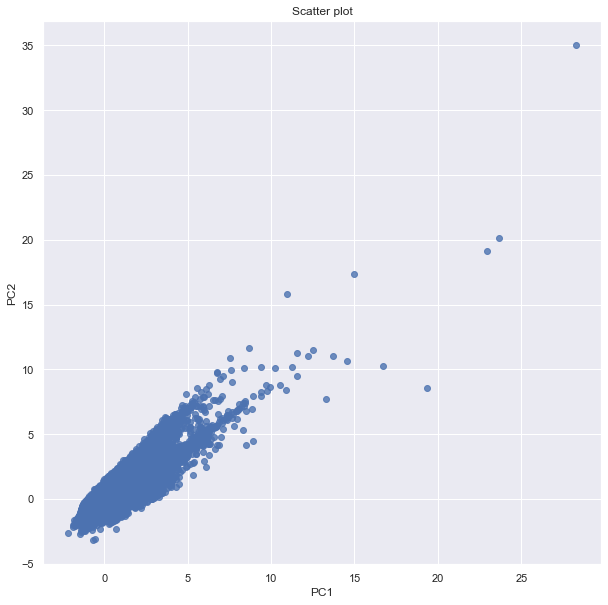

In [62]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(X_train[0], X_train[1], alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Autoencoder

Autoencoder is an unsupervised artificial neural network that learns how to efficiently compress and encode data then learns how to reconstruct the data back from the reduced encoded representation to a representation that is as close to the original input as possible.

Autoencoder, by design, reduces data dimensions by learning how to ignore the noise in the data.

* 1- Encoder: In which the model learns how to reduce the input dimensions and compress the input data into an encoded representation.
* 2- Bottleneck: which is the layer that contains the compressed representation of the input data. This is the lowest possible dimensions of the input data.
* 3- Decoder: In which the model learns how to reconstruct the data from the encoded representation to be as close to the original input as possible.
* 4- Reconstruction Loss: This is the method that measures measure how well the decoder is performing and how close the output is to the original input.

* We will build three models: clf1, clf2, and clf3
* clf1 has hidden_neurons = [25, 2, 2, 25]
* clf2 has hidden_neurons = [25, 10, 2, 10, 25]
* clf3 has hidden_neurons = [25, 15, 10, 2, 10, 15, 25])
* The number of the hidden layers and the number of neutrons in a hidden layer: if there are too many hidden layers or too many neutrons, the model tends to overfit; otherwise the model tends to underfit.

#### Model 1

In [63]:
clf1 = AutoEncoder(epochs = 30, hidden_neurons =[25, 2, 2, 25])
clf1.fit(X_train)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                275       
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 5

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=30,
      hidden_activation='relu', hidden_neurons=[25, 2, 2, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x000001F4B568D820>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

#### Producing outlier scores
* "decision_functions()" predicts the outliers of a dataframe. A higher score means more abnormal. 
* The histogram below shows there are outliers. If we choose 10.0 to be the cutpoint, we can suggest those >=10.0 to be outliers

In [64]:
y_train_scores = clf1.decision_scores_ 
#y_train_scores

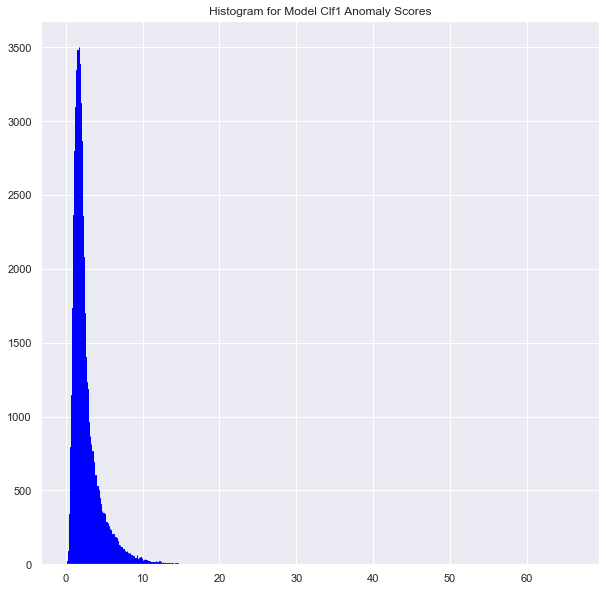

In [65]:
plt.hist(y_train_scores, bins='auto',color='b', edgecolor='blue',linewidth=1)  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

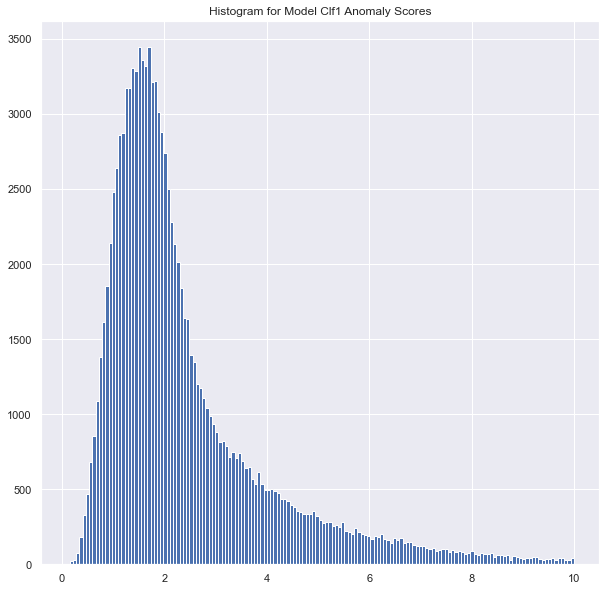

In [73]:
plt.hist(y_train_scores[y_train_scores<10], bins='auto',color='b',linewidth=1)  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

In [66]:
pd.Series(y_train_scores).value_counts()

1.867447    2
1.930413    1
2.434898    1
1.791984    1
1.730834    1
           ..
4.689447    1
1.259456    1
2.178582    1
1.803171    1
2.110952    1
Length: 114144, dtype: int64

In [67]:
df_train = X_train
df_train['score'] = y_train_scores
df_train['cluster'] = np.where(df_train['score']<10, 0, 1)
df_train['cluster'].value_counts()

0    113056
1      1089
Name: cluster, dtype: int64

In [68]:
df_train.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,score
cluster,,,,,,,,,,,
0,-0.022903,-0.024823,-0.021913,-0.017413,-0.009965,-0.025136,-0.025426,-0.023391,-0.022044,-0.009260,2.408973
1,2.377672,2.577077,2.274893,1.807756,1.034494,2.609478,2.639675,2.428350,2.288490,0.961359,12.635525


### Predict based on test data set

In [69]:
y_train_scores = clf1.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf1.predict(X_test)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores_1 = clf1.decision_function(X_test)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores_1 = pd.Series(y_test_scores_1)

In [70]:
y_test_pred.value_counts()

0    44081
1     4839
dtype: int64

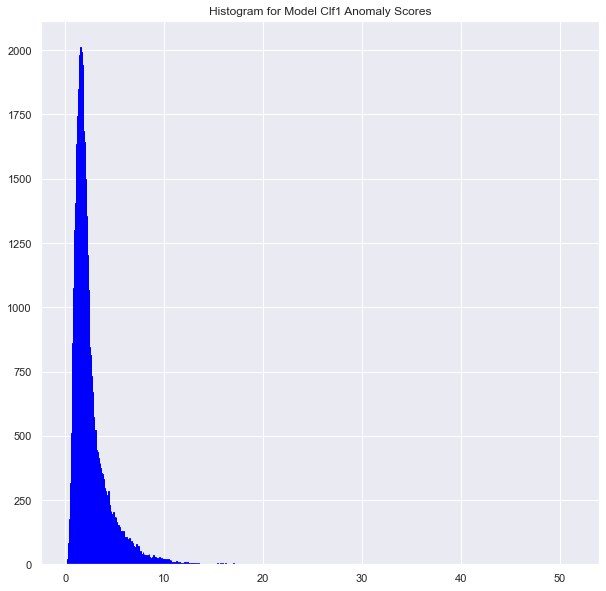

In [71]:
plt.hist(y_test_scores_1, bins='auto',color='b', edgecolor='blue',linewidth=1)  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

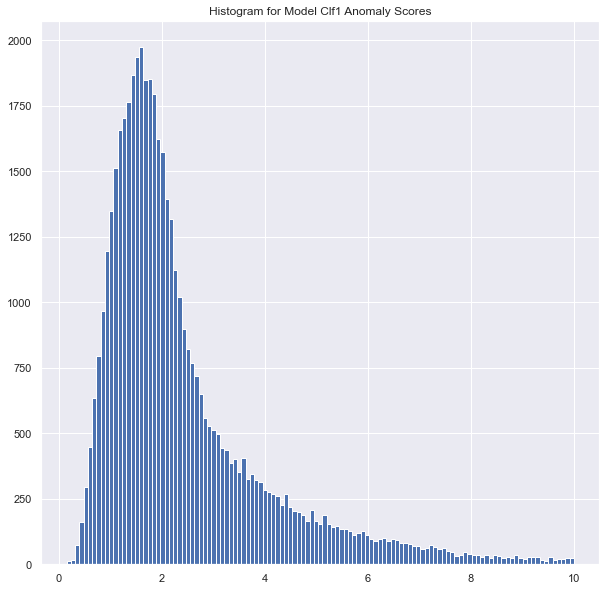

In [76]:
plt.hist(y_test_scores_1[y_test_scores_1<10], bins='auto',color='b')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

In [77]:
df_test = X_test.copy()
df_test['score'] = y_test_scores_1
df_test['cluster'] = np.where(df_test['score']<10, 0, 1)
df_test['cluster'].value_counts()

0    48475
1      445
Name: cluster, dtype: int64

#### Describe the outliers
* We recommend observations in Cluster 1 to be outliers. 
* The attributes of Cluster 1 are shown below.

In [78]:
df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,score
cluster,,,,,,,,,,,
0,-0.021840,-0.023704,-0.020012,-0.016730,-0.008855,-0.024254,-0.024999,-0.023825,-0.022780,-0.009483,2.409695
1,2.379114,2.582093,2.179971,1.822482,0.964592,2.642034,2.723249,2.595301,2.481513,1.033035,12.793144


#### Model 2

In [91]:
clf2 = AutoEncoder(epochs = 30, hidden_neurons =[25, 10,2, 10, 25])
clf2.fit(X_train)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_14 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 25)                275       
_________________________________________________________________
dropout_15 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=30,
      hidden_activation='relu', hidden_neurons=[25, 10, 2, 10, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x000001F4B568D820>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [92]:
y_train_scores = clf2.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf2.predict(X_test)  # outlier labels (0 or 1)
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf2.decision_function(X_test)  # outlier scores

y_test_pred = pd.Series(y_test_pred)
y_test_scores = pd.Series(y_test_scores)

In [93]:
df_train = X_train
df_train['score'] = y_train_scores
df_train['cluster'] = np.where(df_train['score']<10, 0, 1)
df_train['cluster'].value_counts()

0    113056
1      1089
Name: cluster, dtype: int64

In [94]:
df_train.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,score
cluster,,,,,,,,,,,
0,-0.022903,-0.024823,-0.021913,-0.017413,-0.009965,-0.025136,-0.025426,-0.023391,-0.022044,-0.009260,2.408991
1,2.377672,2.577077,2.274893,1.807756,1.034494,2.609478,2.639675,2.428350,2.288490,0.961359,12.635554


### Visualising train data results

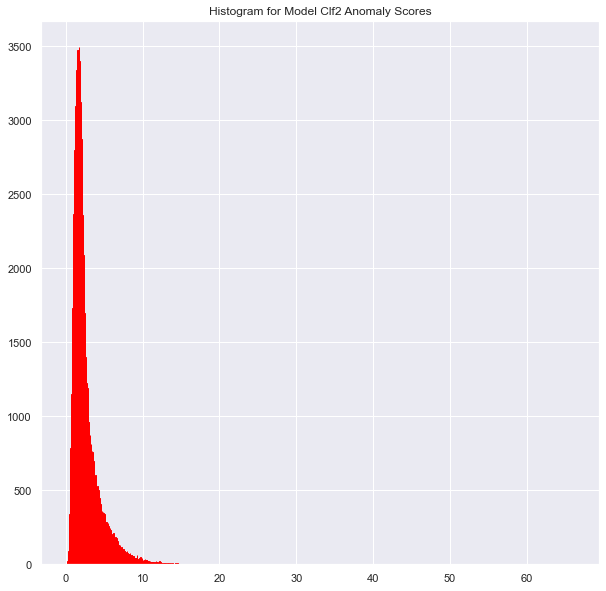

In [95]:
plt.hist(y_train_scores, bins='auto',color='b', edgecolor='red',linewidth=1)  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()

### Visualising train data results with limit 10

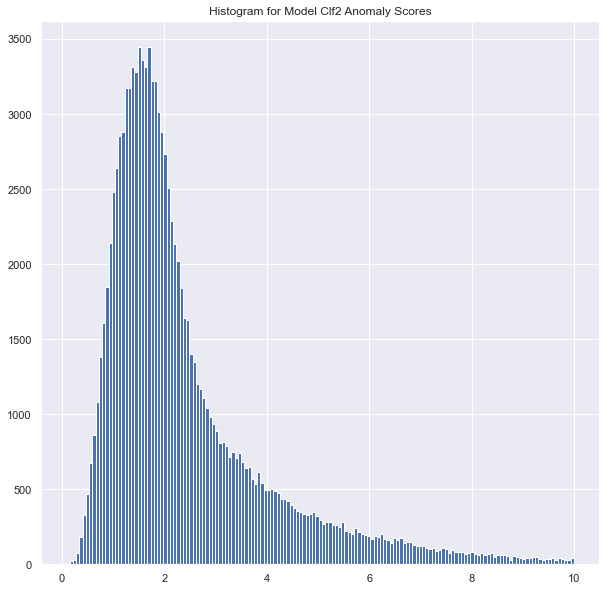

In [96]:
plt.hist(y_train_scores[y_train_scores<10], bins='auto',color='b')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()

In [97]:
pd.Series(y_train_scores).value_counts()

1.867291     2
1.600339     1
2.155963     1
15.015420    1
1.216974     1
            ..
8.003077     1
2.433659     1
3.783516     1
1.343867     1
4.496456     1
Length: 114144, dtype: int64

### Visualising test data results

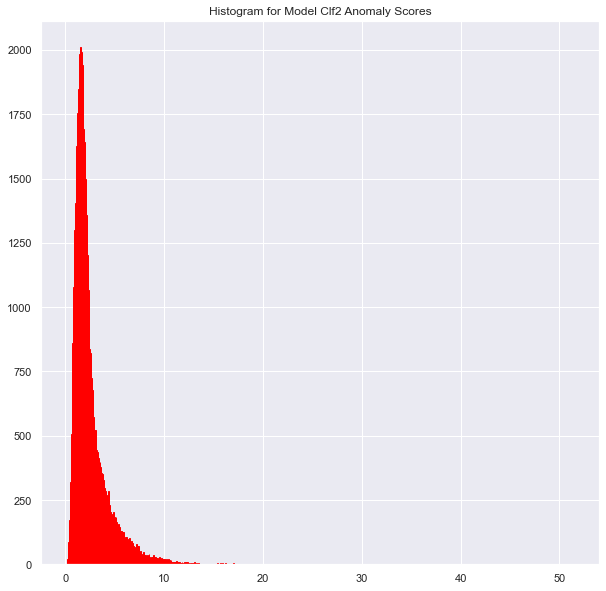

In [98]:
plt.hist(y_test_scores, bins='auto',color='b', edgecolor='red',linewidth=1)  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()

### Visualising test data results with limit 10

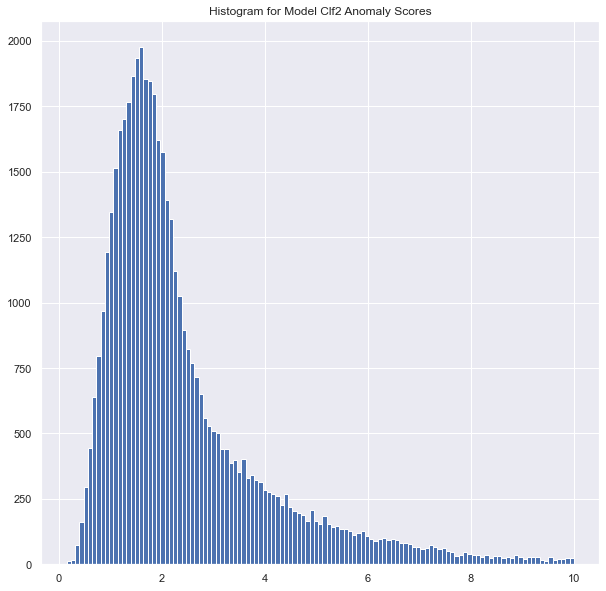

In [100]:
plt.hist(y_test_scores[y_test_scores<10], bins='auto',color='b')  # arguments are passed to np.histogram
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()

In [101]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<10, 0, 1)
df_test['cluster'].value_counts()

0    48475
1      445
Name: cluster, dtype: int64

In [102]:
df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,score
cluster,,,,,,,,,,,
0,-0.021840,-0.023704,-0.020012,-0.016730,-0.008855,-0.024254,-0.024999,-0.023825,-0.022780,-0.009483,2.409715
1,2.379114,2.582093,2.179971,1.822482,0.964592,2.642034,2.723249,2.595301,2.481513,1.033035,12.793170


#### Model 3

In [114]:
clf3 = AutoEncoder(hidden_neurons =[25, 15, 10, 2, 10,15, 25])
clf3.fit(X_train)

# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf3.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_29 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_30 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 25)                275       
_________________________________________________________________
dropout_31 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 15)               

3211/3211 [==============================] - 3s 993us/step - loss: 0.9999 - val_loss: 1.0009
Epoch 53/100
3211/3211 [==============================] - 3s 993us/step - loss: 0.9999 - val_loss: 1.0009
Epoch 54/100
3211/3211 [==============================] - 3s 1ms/step - loss: 0.9999 - val_loss: 1.0009
Epoch 55/100
3211/3211 [==============================] - 3s 993us/step - loss: 0.9999 - val_loss: 1.0009
Epoch 56/100
3211/3211 [==============================] - 3s 1ms/step - loss: 0.9999 - val_loss: 1.0009
Epoch 57/100
3211/3211 [==============================] - 3s 1ms/step - loss: 0.9999 - val_loss: 1.0009
Epoch 58/100
3211/3211 [==============================] - 3s 992us/step - loss: 0.9999 - val_loss: 1.0009
Epoch 59/100
3211/3211 [==============================] - 4s 1ms/step - loss: 0.9999 - val_loss: 1.0009
Epoch 60/100
3211/3211 [==============================] - 5s 1ms/step - loss: 0.9999 - val_loss: 1.0009
Epoch 61/100
3211/3211 [==============================] - 4s 1ms/step

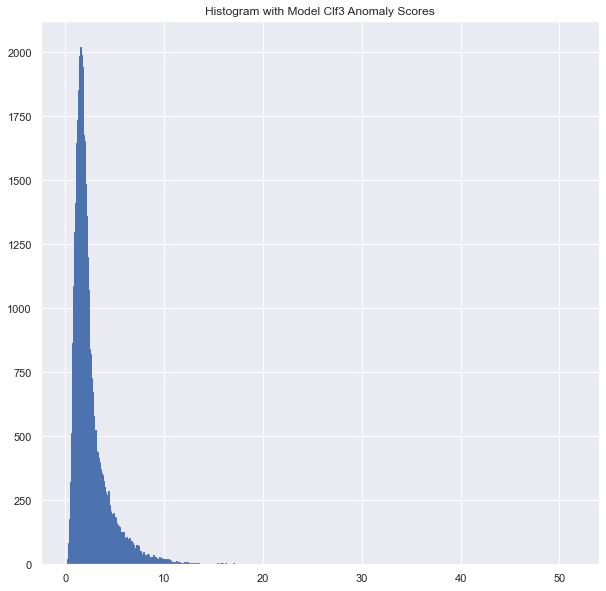

In [132]:
plt.hist(y_test_scores, bins='auto', edgecolor='b',linewidth=1)  
plt.title("Histogram with Model Clf3 Anomaly Scores")
plt.show()

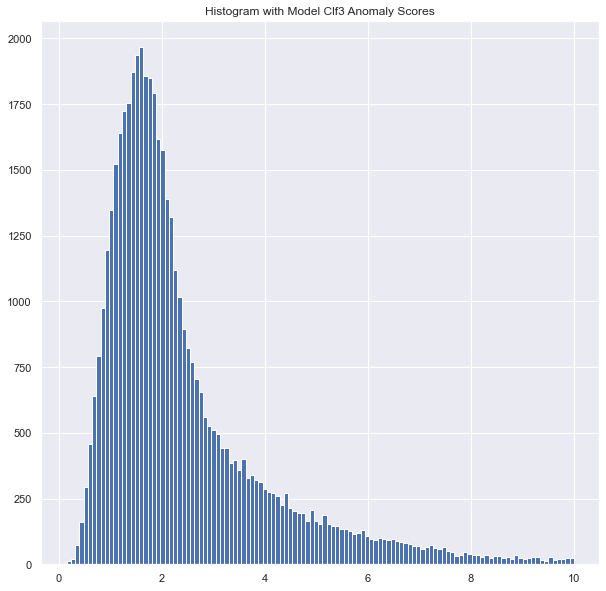

In [116]:
plt.hist(y_test_scores[y_test_scores<10], bins='auto',color='b')  
plt.title("Histogram with Model Clf3 Anomaly Scores")
plt.show()

In [117]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<10, 0, 1)
df_test['cluster'].value_counts()

0    48475
1      445
Name: cluster, dtype: int64

In [118]:
df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,score
cluster,,,,,,,,,,,
0,-0.021840,-0.023704,-0.020012,-0.016730,-0.008855,-0.024254,-0.024999,-0.023825,-0.022780,-0.009483,2.409397
1,2.379114,2.582093,2.179971,1.822482,0.964592,2.642034,2.723249,2.595301,2.481513,1.033035,12.794296


## Achieve Model Stability by Aggregating Multiple Models
* Unsupervised techniques can detect many outliers. But due to its unspervised nature it is not stable, meaning overfitting to a specific dataset.
* The solution is to train multiple models then aggregate the scores. 
* There are two methods to aggregate the outcome:
* (1) Average: average scores of all detectors.
* (2) Maximum of Maximum (MOM)

In [119]:
from pyod.models.combination import aom, moa, average, maximization

# Put all the predictions in a data frame
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                             'clf2': clf2.decision_function(X_test),
                             'clf3': clf3.decision_function(X_test) 
                            })

In [120]:
train_scores.head()

,clf1,clf2,clf3
0,1.139600,1.139616,1.137920
1,1.137967,1.137957,1.136638
2,3.162483,3.161968,3.161388
3,1.538298,1.538016,1.536702
4,1.060475,1.059903,1.059008


In [121]:
test_scores.head()

,clf1,clf2,clf3
0,1.509560,1.510035,1.511193
1,5.309640,5.309751,5.311020
2,2.039707,2.039478,2.037773
3,2.056322,2.056406,2.055010
4,0.798286,0.798158,0.796928


In [122]:
from pyod.utils.utility import standardizer
# Although we did standardization before, it was for the variables.
# Now we do the standardization for the decision scores
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [123]:
train_scores_norm.shape

(114145, 3)

### Average
The "average" function in PyOD averages the outlier scores from multiple estimators.

In [124]:
# Combination by average
y_by_average = average(test_scores_norm)
y_by_average[1:10]

array([ 1.45408925, -0.24244188, -0.2336632 , -0.88616851, -0.21522893,
       -0.21417793,  0.45745884, -0.76646476, -0.14385705])

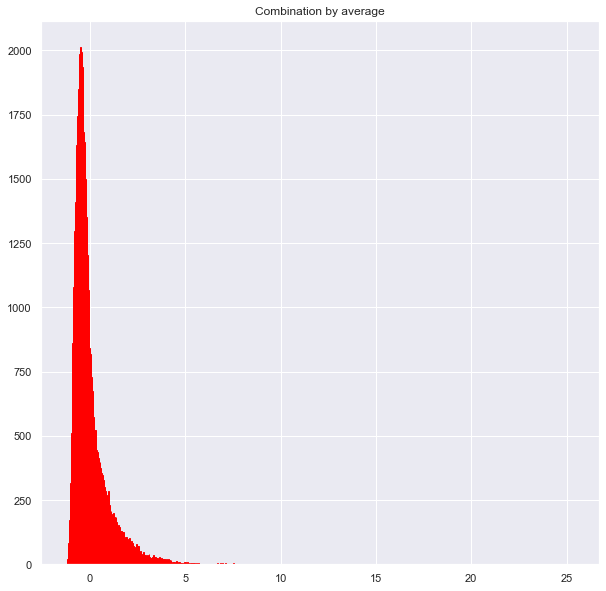

In [125]:
# Combination by average
y_by_average = average(test_scores_norm)
plt.hist(y_by_average, bins='auto',color='b', edgecolor='red',linewidth=1)  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

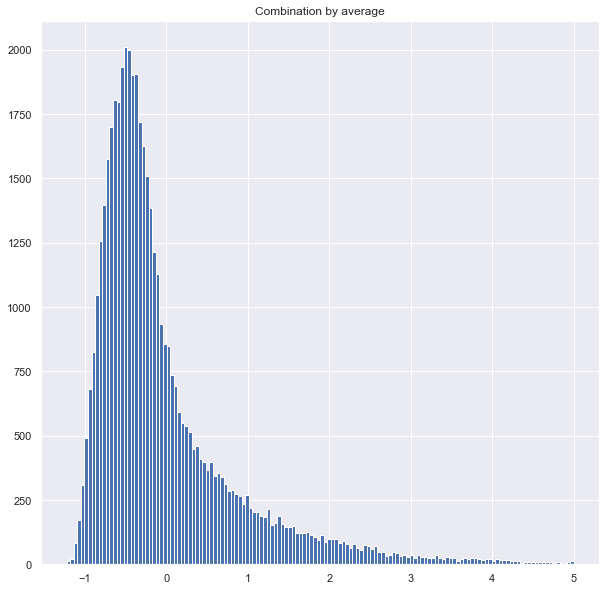

In [127]:
# Combination by average
plt.hist(y_by_average[y_by_average<5], bins='auto',color='b')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

It appears we can identify those >=5 as the outliers

In [128]:
df_test = pd.DataFrame(X_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<=5, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    48747
1      173
Name: y_by_average_cluster, dtype: int64

In [129]:
df_test.groupby('y_by_average_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,y_by_average_score
y_by_average_cluster,,,,,,,,,,,
0,-0.011805,-0.012641,-0.010646,-0.008710,-0.005719,-0.012595,-0.012833,-0.011833,-0.011261,-0.003962,-0.025818
1,3.326327,3.561891,2.999722,2.454304,1.611371,3.548859,3.616135,3.334309,3.172944,1.116486,6.924451


### Maximum of maximum
Merge the outlier scores from multiple estimators by taking the maximum.

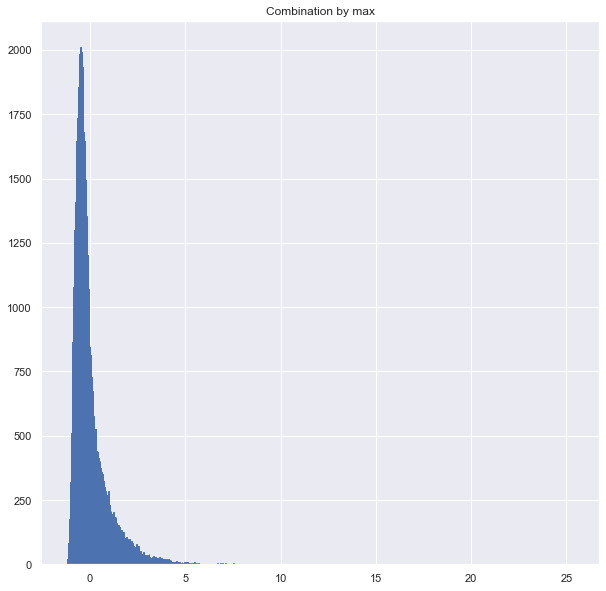

In [136]:
# Combination by max
y_by_maximization = maximization(test_scores_norm)
plt.hist(y_by_maximization, bins='auto', edgecolor='b')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

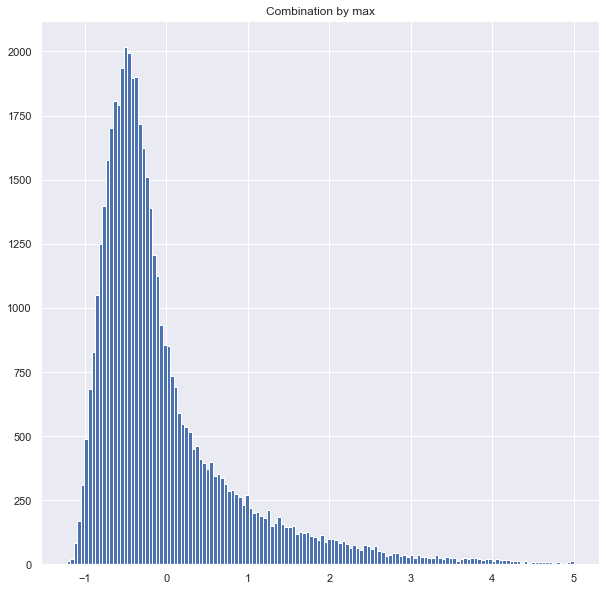

In [135]:
# Combination by max
plt.hist(y_by_maximization[y_by_maximization<5], bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

Similarly, it appears we can identify those >=5 as the outliers

In [137]:
df_test = X_test.copy()
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<5, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    48747
1      173
Name: y_by_maximization_cluster, dtype: int64

In [138]:
df_test.groupby('y_by_maximization_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,y_by_average_score,y_by_average_cluster,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,,,
0,-0.011805,-0.012641,-0.010646,-0.008710,-0.005719,-0.012595,-0.012833,-0.011833,-0.011261,-0.003962,-0.025818,0,-0.025520
1,3.326327,3.561891,2.999722,2.454304,1.611371,3.548859,3.616135,3.334309,3.172944,1.116486,6.924451,1,6.924738


## IForest
Isolation forest is the first anomaly detection algorithm that identifies anomalies using isolation. It was initially proposed and developed by Fei Tony Liu, Kai Ming Ting and Zhi-Hua Zhou in 2008. The significance of this research lies in its deviation from the mainstream philosophy underlying existing anomaly detectors at the time, where normal instances are profiled before anomalies are identified as instances that do not conform. 

* We will create three models: clf1, clf2,and clf3
* Model 1: max_samples = 100
* Model 2: max_samples = 80
* Model 3: max_samples = 60
* Suppose your data has 10,000 samples, you can set the max_samples to be anywhere between 100 and 10,000.

#### Model 1

In [139]:
from pyod.models.iforest import IForest

In [140]:
X_train, X_test = train_test_split(df2,test_size = 0.3, random_state=0)

In [141]:
clf1 = IForest(behaviour="new", max_samples=100) 
clf1.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=100, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

* After modeling, there is an anomaly score for each observation in the training dataset X_Train.

In [142]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
# We apply the model to the test data X_test to get the outlier scores.
y_test_scores = clf1.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

0   -0.149209
1   -0.011803
2   -0.141303
3   -0.157556
4   -0.173797
dtype: float64

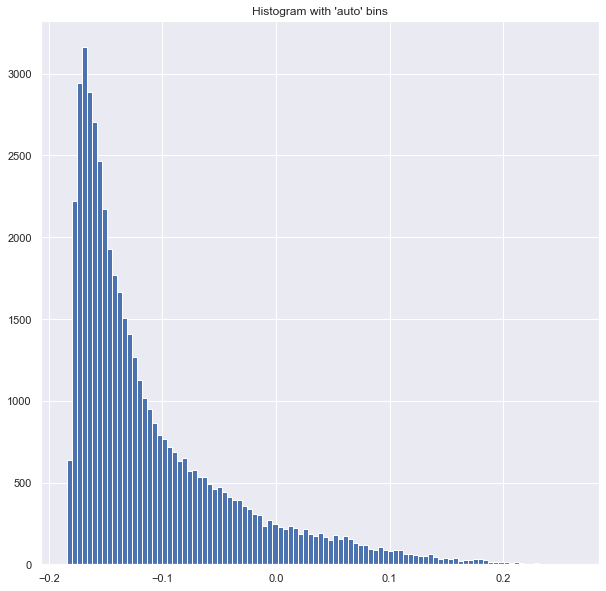

In [143]:
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

* We will identify the outliers as a cluster and demonstrate the X attributes
* A high anomaly score means more abnormal. We can suggest those >=0.05 to be outliers

In [151]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.1, 0, 1)
X_test_cluster['cluster'].value_counts()

1    34692
0    14228
Name: cluster, dtype: int64

In [153]:
X_test_cluster.groupby('cluster').mean()

,drg_avg_ratio_amount,drgState_avg_ratio_amount,drgRegion_avg_ratio_amount,drgCity_avg_ratio_amount,drgZip_avg_ratio_amount,drg_avg_ratio_discharges,drgState_avg_ratio_discharges,drgRegion_avg_ratio_discharges,drgCity_avg_ratio_discharges,drgZip_avg_ratio_discharges,distance
cluster,,,,,,,,,,,
0,0.998483,0.999363,0.999201,0.999629,0.999905,1.002775,1.001375,1.001926,0.999297,0.999742,-0.115675
1,0.999662,0.999049,0.999648,1.000078,1.000001,0.996180,0.996534,0.997623,1.000035,1.000015,0.139541


* We recommend observations in Cluster 1 to be outliers. The average "distance" indicates the distances of those points in Cluster 1. The distance of Cluster 1 is higher than that of Cluster 0, meaning points in Cluster 1 are far away from other points.

#### Model 2

In [154]:
clf2 = IForest(behaviour="new", max_samples=80) 
clf2.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=80, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [155]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf2.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

0   -0.152068
1   -0.025234
2   -0.146938
3   -0.160672
4   -0.177248
dtype: float64

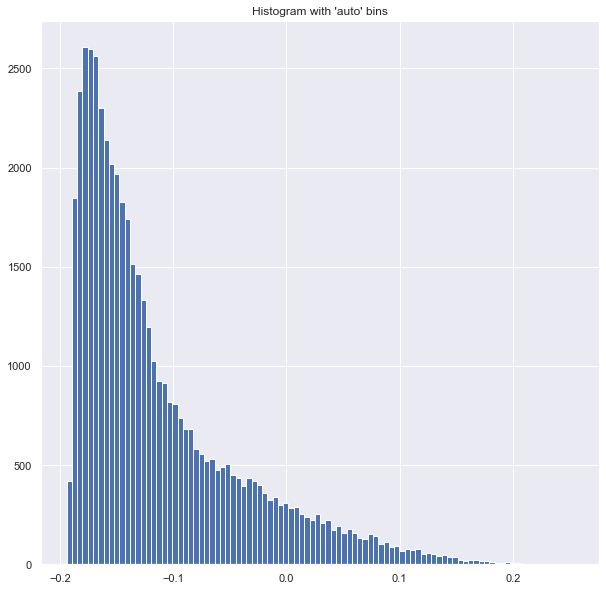

In [156]:
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [157]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.1, 0, 1)
X_test_cluster['cluster'].value_counts()

1    34616
0    14304
Name: cluster, dtype: int64

In [158]:
X_test_cluster.groupby('cluster').mean()

,drg_avg_ratio_amount,drgState_avg_ratio_amount,drgRegion_avg_ratio_amount,drgCity_avg_ratio_amount,drgZip_avg_ratio_amount,drg_avg_ratio_discharges,drgState_avg_ratio_discharges,drgRegion_avg_ratio_discharges,drgCity_avg_ratio_discharges,drgZip_avg_ratio_discharges,distance
cluster,,,,,,,,,,,
0,0.998386,0.999453,0.999250,0.999641,0.999896,1.003186,1.001491,1.001804,0.999371,0.999679,-0.117630
1,0.999704,0.999011,0.999629,1.000074,1.000006,0.995996,0.996475,0.997664,1.000006,1.000042,0.132475


#### Model 3

In [159]:
clf3 = IForest(behaviour="new", max_samples=60) 
clf3.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=60, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [160]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf3.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

0   -0.159383
1   -0.024668
2   -0.164259
3   -0.165553
4   -0.184203
dtype: float64

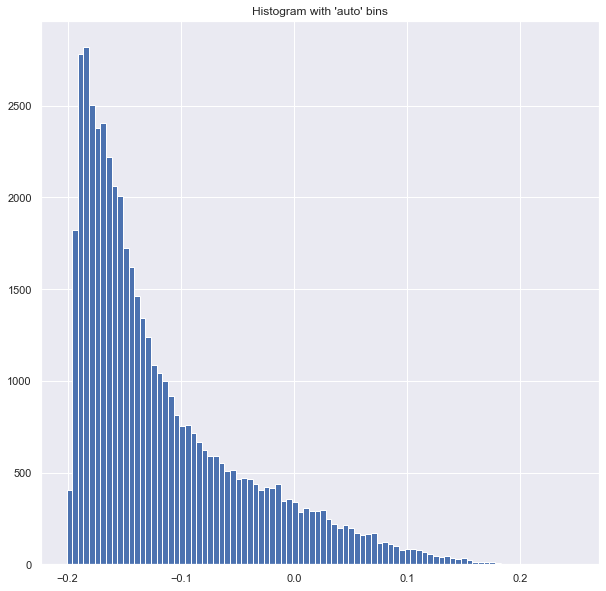

In [161]:
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [162]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.1, 0, 1)
X_test_cluster['cluster'].value_counts()

1    34571
0    14349
Name: cluster, dtype: int64

In [163]:
X_test_cluster.groupby('cluster').mean()

,drg_avg_ratio_amount,drgState_avg_ratio_amount,drgRegion_avg_ratio_amount,drgCity_avg_ratio_amount,drgZip_avg_ratio_amount,drg_avg_ratio_discharges,drgState_avg_ratio_discharges,drgRegion_avg_ratio_discharges,drgCity_avg_ratio_discharges,drgZip_avg_ratio_discharges,distance
cluster,,,,,,,,,,,
0,0.998203,0.999204,0.999047,0.999469,0.999836,1.003473,1.001670,1.001701,0.999371,0.999806,-0.120461
1,0.999782,0.999113,0.999714,1.000146,1.000031,0.995867,0.996394,0.997701,1.000007,0.999990,0.128906


## Achieve Model Stability by Aggregating Multiple Models
* Unsupervised techniques can detect many outliers. But due to its unspervised nature it is not stable, meaning overfitting to a specific dataset.
* The solution is to train multiple models then aggregate the scores. 
* There are two methods to aggregate the outcome:
* (1) Average: average scores of all detectors.
* (2) Maximum of Maximum (MOM)

In [164]:
# The predictions of the training data can be obtained by clf.decision_scores_.
# It is already generated during the model building process.
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

# The predictions of the test data need to be predicted using clf.decision_function(X_test)
test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                             'clf2': clf2.decision_function(X_test),
                             'clf3': clf3.decision_function(X_test) 
                            })

In [165]:
train_scores.head()

,clf1,clf2,clf3
0,-0.179364,-0.192029,-0.193779
1,-0.168112,-0.183172,-0.190337
2,-0.076217,-0.079675,-0.064619
3,-0.161140,-0.171720,-0.157592
4,-0.171121,-0.169693,-0.178021


In [166]:
test_scores.head()

,clf1,clf2,clf3
0,-0.149209,-0.152068,-0.159383
1,-0.011803,-0.025234,-0.024668
2,-0.141303,-0.146938,-0.164259
3,-0.157556,-0.160672,-0.165553
4,-0.173797,-0.177248,-0.184203


In [167]:
# Although we did standardization before, it was for the variables.
# Now we do the standardization for the decision scores
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

In [168]:
train_scores_norm.shape

(114145, 3)

### Average
The "average" function in PyOD averages the outlier scores from multiple estimators.

In [169]:
# Combination by average
y_by_average = average(test_scores_norm)
y_by_average[1:10]

array([ 1.23409034, -0.52436207, -0.66555718, -0.89712517, -0.61791227,
       -0.51319013,  0.45044133, -0.78719856,  0.24203402])

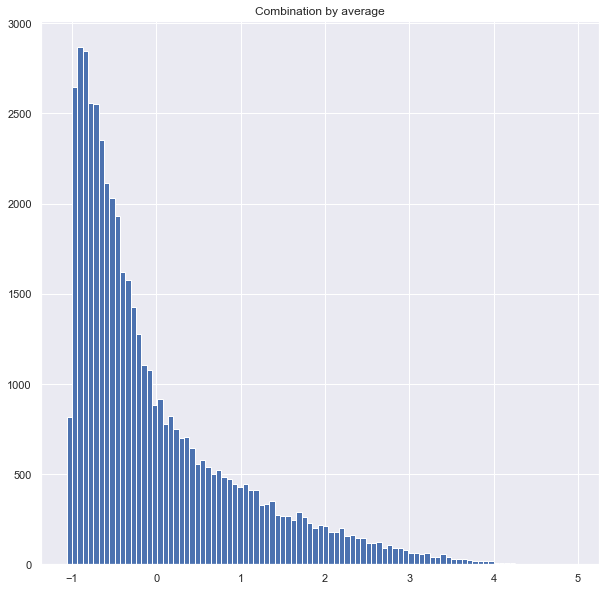

In [170]:
# Combination by average
y_by_average = average(test_scores_norm)
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [171]:
# I have chosen 3 as limit because the histogram asymptote is from 3
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<3.5, 0, 1)
df_test['y_by_average_cluster'].value_counts()

0    48693
1      227
Name: y_by_average_cluster, dtype: int64

In [172]:
df_test.groupby('y_by_average_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,y_by_average_score,y_by_maximization_score,y_by_maximization_cluster
y_by_average_cluster,,,,,,,,,,,,,
0,-0.010166,-0.011579,-0.009827,-0.010820,-0.009265,-0.013691,-0.014561,-0.013607,-0.01403,-0.009491,-0.030223,-0.025124,0.001663
1,2.180646,2.483850,2.108047,2.321036,1.987306,2.936843,3.123470,2.918880,3.00950,2.035929,3.806770,5.186521,0.405286


### Maximum of maximum

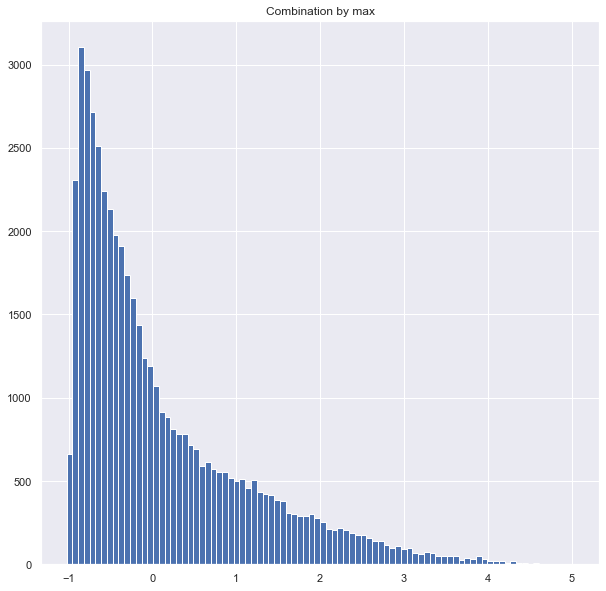

In [173]:
# Combination by max
y_by_maximization = maximization(test_scores_norm)
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

In [174]:
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<3.5, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

0    48530
1      390
Name: y_by_maximization_cluster, dtype: int64

In [175]:
df_test.groupby('y_by_maximization_cluster').mean()

,0,1,2,3,4,5,6,7,8,9,y_by_average_score,y_by_average_cluster,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,,,
0,-0.016917,-0.018922,-0.016096,-0.017330,-0.016023,-0.017491,-0.018844,-0.017651,-0.017957,-0.010159,-0.041543,0.000000,0.072371
1,2.105125,2.354591,2.002960,2.156483,1.993847,2.176456,2.344852,2.196357,2.234539,1.264145,3.611690,0.582051,3.883418


In [176]:
test_scores_norm.shape

(48920, 3)

## Conclusion

We have used Autoencoding and Iforest to identify anomalies in the health care data set. 
For each of the algorithms we have created 3 model, in total 6.
These models consistently identify around 5% of the data as anomalous. Further investigations into their activities will yield concrete evidence.